# **Aplicação de Aprendizado de Máquina na Classificação de Extinção de Cursos de Graduação**

***Autor:*** *Francisco Willem Romão Moreira*

Este projeto visa fazer uma classificação do "risco" de extinção de um curso de graduação no Brasil com base na variável SITUAÇÃO_CURSO que possui as categorias: *Em atividade*, *Extinto* e *Em extinção*.

Os dados utilizados nesse projeto foram extraídos da página: [Dados Abertos MEC](<https://dadosabertos.mec.gov.br/indicadores-sobre-ensino-superior/item/183-cursos-de-graduacao-do-brasil>).

# **Bibliotecas**

Manipulação e visualização de dados:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import gdown

Transformação de dados:

In [ ]:
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 924.3 kB/s eta 0:00:00


In [ ]:
from category_encoders import BinaryEncoder

Aprendizado de Máquina:

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
import joblib

# **Download do dataset via Google Drive**



In [ ]:
!pip install gdown

In [ ]:
url = 'https://drive.google.com/file/d/11z9j5YM_fFH6UFWusgEBmbQHpPhaUTvi/view?usp=sharing'
output = 'dataset_ies.csv'
gdown.download(url, output, quiet=False, fuzzy=True)
print('Arquivo baixado:', os.path.exists(output))

Downloading...
From (original): https://drive.google.com/uc?id=11z9j5YM_fFH6UFWusgEBmbQHpPhaUTvi
From (redirected): https://drive.google.com/uc?id=11z9j5YM_fFH6UFWusgEBmbQHpPhaUTvi&confirm=t&uuid=a2a39fcd-83d7-4998-a7a8-a8f01aba4e04
To: /content/dataset_ies.csv
100%|██████████| 237M/237M [00:03<00:00, 73.7MB/s]

Arquivo baixado: True


In [ ]:
df = pd.read_csv('dataset_ies.csv')

In [ ]:
df.head()

,CODIGO_IES,NOME_IES,CATEGORIA_ADMINISTRATIVA,ORGANIZACAO_ACADEMICA,CODIGO_CURSO,NOME_CURSO,GRAU,AREA_OCDE,MODALIDADE,SITUACAO_CURSO,QT_VAGAS_AUTORIZADAS,CARGA_HORARIA,CODIGO_AREA_OCDE_CINE,AREA_OCDE_CINE,CODIGO_MUNICIPIO,MUNICIPIO,UF,REGIAO
0,4751,CENTRO UNIVERSITÁRIO UNIFATECIE,Privada com fins lucrativos,Centro Universitário,1556773,ENGENHARIA AGRONÔMICA,Bacharelado,Agronomia,Educação a Distância,Em atividade,1000,4400,301,Agronomia,3541406,Presidente Prudente,SP,SUDESTE
1,1491,CENTRO UNIVERSITÁRIO INTERNACIONAL,Privada com fins lucrativos,Centro Universitário,1186955,LETRAS,Licenciatura,Formação de professor de língua/literatura ver...,Educação a Distância,Em atividade,3000,3992,58,Formação de professor de língua/literatura ver...,2516201,Sousa,PB,NORDESTE
2,1472,CENTRO UNIVERSITÁRIO LEONARDO DA VINCI,Privada com fins lucrativos,Centro Universitário,99950,GEOGRAFIA,Licenciatura,Formação de professor de geografia,Educação a Distância,Em atividade,7620,3500,39,Formação de professor de geografia,2800308,Aracaju,SE,NORDESTE
3,221,UNIVERSIDADE CRUZEIRO DO SUL,Privada com fins lucrativos,Universidade,1467998,EDUCAÇÃO FÍSICA,Bacharelado,Educação física,Educação a Distância,Em atividade,1200,3200,328,Educação física,4113205,Lapa,PR,SUL
4,1472,CENTRO UNIVERSITÁRIO LEONARDO DA VINCI,Privada com fins lucrativos,Centro Universitário,1516788,SERVIÇOS PENAIS,Tecnológico,NaN,Educação a Distância,Em atividade,1500,1980,357,Serviços penais,2601706,Belo Jardim,PE,NORDESTE


In [ ]:
df.shape

(902676, 18)

# **Pré-processamento**

A seguir todas as etapas de pré-processamento para que os dados estejam adequados para os algoritmos de classificação.

## **Seleção de atributos (Feature selection)**

Primeiro vamos extrair os atributos mais relevantes e descartar variáveis que não são importantes para o problema em questão.

In [ ]:
df.columns

Index(['CODIGO_IES', 'NOME_IES', 'CATEGORIA_ADMINISTRATIVA',
       'ORGANIZACAO_ACADEMICA', 'CODIGO_CURSO', 'NOME_CURSO', 'GRAU',
       'AREA_OCDE', 'MODALIDADE', 'SITUACAO_CURSO', 'QT_VAGAS_AUTORIZADAS',
       'CARGA_HORARIA', 'CODIGO_AREA_OCDE_CINE', 'AREA_OCDE_CINE',
       'CODIGO_MUNICIPIO', 'MUNICIPIO', 'UF', 'REGIAO'],
      dtype='object')

In [ ]:
df.drop(columns=['CODIGO_IES', 'NOME_IES',
                 'CODIGO_CURSO','NOME_CURSO',
                 'AREA_OCDE', 'CODIGO_AREA_OCDE_CINE',
                 'AREA_OCDE_CINE', 'CODIGO_MUNICIPIO',
                 'MUNICIPIO', 'UF'],inplace=True)

Após a remoção, ficamos com os seguintes atributos:

In [ ]:
df.columns

Index(['CATEGORIA_ADMINISTRATIVA', 'ORGANIZACAO_ACADEMICA', 'GRAU',
       'MODALIDADE', 'SITUACAO_CURSO', 'QT_VAGAS_AUTORIZADAS', 'CARGA_HORARIA',
       'REGIAO'],
      dtype='object')

## **Correção de dados inválidos**

Nesta etapa vamos analisar quais categorias estão presentes em cada atributo, e em caso de dados inválidos, corrigir.

In [ ]:
df['CATEGORIA_ADMINISTRATIVA'].unique()

array(['Privada com fins lucrativos', 'Privada sem fins lucrativos',
       'Pública Municipal', 'Pública Federal', 'Pública Estadual',
       'Especial'], dtype=object)

In [ ]:
df['ORGANIZACAO_ACADEMICA'].unique()

array(['Centro Universitário', 'Universidade', 'Faculdade',
       'Instituto Federal de Educação, Ciência e Tecnologia',
       'Centro Federal de Educação Tecnológica',
       'Instituição Especialmente Credenciada para oferta de cursos lato sensu'],
      dtype=object)

In [ ]:
df['GRAU'].unique()

array(['Bacharelado', 'Licenciatura', 'Tecnológico',
       'Área Básica de Ingresso (ABI)', 'Sequencial'], dtype=object)

In [ ]:
df['MODALIDADE'].unique()

array(['Educação a Distância', 'Educação Presencial'], dtype=object)

In [ ]:
df['SITUACAO_CURSO'].unique()

array(['Em atividade', 'Em extinção', 'Extinto'], dtype=object)

In [ ]:
df['REGIAO'].unique()

array(['SUDESTE', 'NORDESTE', 'SUL', 'CENTRO-OESTE', 'NORTE',
       'IGNORADO/EXTERIOR'], dtype=object)

## **Tratamento de dados ausentes**

Identificar e tratar dados faltantes é primordial no contexto de algoritmos de aprendizado de máquina, uma vez que pode afetar o desempenho e a precisão, desviando a capacidade do modelo capturar os padrões corretos.

Tratar dados ausentes também garante que possamos utilizar uma gama mais ampla de algoritmos sem ter problemas técnicos.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 902676 entries, 0 to 902675
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   CATEGORIA_ADMINISTRATIVA  902676 non-null  object
 1   ORGANIZACAO_ACADEMICA     902676 non-null  object
 2   GRAU                      902676 non-null  object
 3   MODALIDADE                902676 non-null  object
 4   SITUACAO_CURSO            902676 non-null  object
 5   QT_VAGAS_AUTORIZADAS      902676 non-null  int64 
 6   CARGA_HORARIA             902676 non-null  int64 
 7   REGIAO                    902676 non-null  object
dtypes: int64(2), object(6)
memory usage: 55.1+ MB


In [ ]:
df.isnull().sum()

,0
CATEGORIA_ADMINISTRATIVA,0
ORGANIZACAO_ACADEMICA,0
GRAU,0
MODALIDADE,0
SITUACAO_CURSO,0
QT_VAGAS_AUTORIZADAS,0
CARGA_HORARIA,0
REGIAO,0


Como visto acima, felizmente a qualidade dos dados em termos de dados ausentes está excelente, já que não apresenta eles.

## **Tratamento de ruídos e outliers - IQR**

Já que nosso dataset contém dados numéricos para dois atributos é ideal identificá-los e tratá-los.

Vamos começar identificando os outliers usando visualização com o gráfico de boxplot.

Text(0.5, 1.0, 'Quantidade de Vagas Autorizadas')

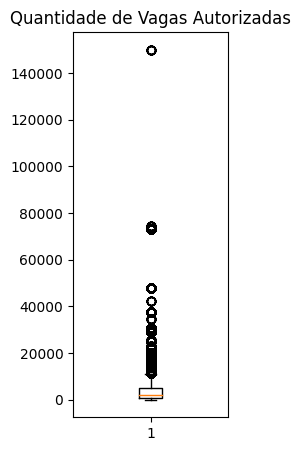

In [ ]:
plt.figure(figsize=(2,5))
plt.boxplot(df['QT_VAGAS_AUTORIZADAS'])
plt.title('Quantidade de Vagas Autorizadas')

Text(0.5, 1.0, 'Carga Horária')

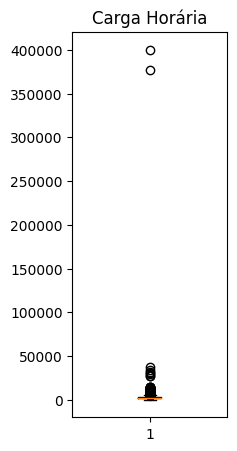

In [ ]:
plt.figure(figsize=(2,5))
plt.boxplot(df['CARGA_HORARIA'])
plt.title('Carga Horária')

É claramente perceptível a presença de outliers/ruídos para esses atributos. Com isso, vamos aplicar o método **Intervalo Entre Quartis** do inglês *Interquartile Range* mai conhecido como IQR.

O IQR é uma técnica estatística utilizada para medir a dispersão central de um conjunto de dados, calculando a diferença entre o terceiro quartil e o primeiro quartil. Ao representar a faixa em que se concentram os 50% centrais dos dados, ele é resistente a outliers.

Para mais detalhes: [clique aqui](https://docs.oracle.com/cloud/help/pt_BR/pbcs_common/PFUSU/insights_metrics_IQR.htm#PFUSU-GUID-CF37CAEA-730B-4346-801E-64612719FF6B).

Com isso, removemos os ruídos/outliers presentes no nosso conjunto de dados e perdemos proporcionalmente poucos dados.

In [ ]:
df.shape

(902676, 8)

In [ ]:
reduction = 902676 - 825321
reduction = (reduction/902676)*100
print(f'Quantidade de dados perdidos pós IQR: {reduction:.1f}%')

Quantidade de dados perdidos pós IQR: 8.6%


In [ ]:
def get_iqr_outliers (df, columns):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  return lower_bound, upper_bound

for column in df.select_dtypes(include=['number']).columns:
  lower_bound, upper_bound = get_iqr_outliers(df, column)
  print(f'Coluna: {column}')
  print(f'Lower bound: {lower_bound}')
  print(f'Upper bound: {upper_bound}')

for column in df.select_dtypes(include=['number']).columns:
    lower_bound, upper_bound = get_iqr_outliers(df, column)
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

Coluna: QT_VAGAS_AUTORIZADAS
Lower bound: -5590.0
Upper bound: 11354.0
Coluna: CARGA_HORARIA
Lower bound: -186.0
Upper bound: 5430.0


Após a aplicação das técnicas veremos como melhorou a distribuição dos dados.

Text(0.5, 1.0, 'Quantidade de Vagas Autorizadas (pós IQR)')

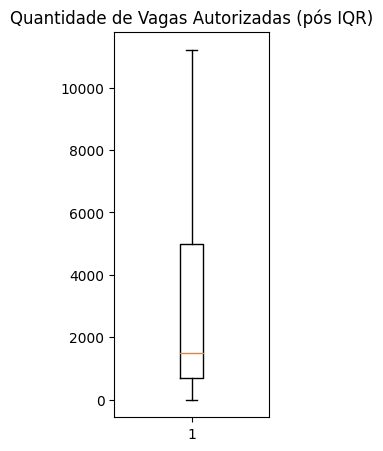

In [ ]:
plt.figure(figsize=(2,5))
plt.boxplot(df['QT_VAGAS_AUTORIZADAS'])
plt.title('Quantidade de Vagas Autorizadas (pós IQR)')

Text(0.5, 1.0, 'Carga Horária (pós IQR)')

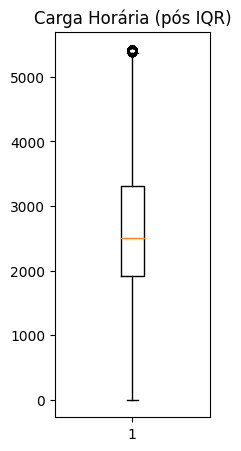

In [ ]:
plt.figure(figsize=(2,5))
plt.boxplot(df['CARGA_HORARIA'])
plt.title('Carga Horária (pós IQR)')

## **Balanceamento - Under-sampling**

Agora chegamos numa etapa de extrema importância para algoritmos de classificação, o balanceamento dos dados.

Balancear os dados garante que o modelo consiga aprender a diferenciar corretamente as classes, especialmente se elas tiverem desproporcionais. Por exemplo, em caso de classes desproporcionalmente altas, o modelo pode tender a prever essa classe majoritária em relação a outras, ignorando a classes minoritárias.

As técnicas mais comuns incluem **oversampling** (aumentar a classse minoritária), **undersampling** (diminuir a classe majoritária) e **equilíbrio de pesos** usando algoritmos que adotam pesos para cada classe.

No nosso contexto eu escolhi usar a undersampling para aproveitar a redução do tamanho do dataset e consequentemente diminuir o tempo de treinamento dos algoritmos de classificação.

In [ ]:
df['SITUACAO_CURSO'].unique()

array(['Em atividade', 'Em extinção', 'Extinto'], dtype=object)

In [ ]:
df['SITUACAO_CURSO'].value_counts()

,count
SITUACAO_CURSO,
Em atividade,776097
Extinto,39017
Em extinção,10207


É mostrado acima a frequência de cada classe, onde a classe *Em atividade* é a majoritária, e *Em extinção* a classe minoritária. Aplicando o undersampling teremos pouco mais de 30 mil dados.

In [ ]:
df_class_0 = df[df['SITUACAO_CURSO'] == 'Em atividade']
df_class_1 = df[df['SITUACAO_CURSO'] == 'Em extinção']
df_class_2 = df[df['SITUACAO_CURSO'] == 'Extinto']

min_class_size = min(len(df_class_0), len(df_class_1), len(df_class_2))

df_class_0_downsampled = resample(df_class_0,
                                  replace=False,
                                  n_samples=min_class_size,
                                  random_state=123)
df_class_1_downsampled = resample(df_class_1,
                                  replace=False,
                                  n_samples=min_class_size,
                                  random_state=123)
df_class_2_downsampled = resample(df_class_2,
                                  replace=False,
                                  n_samples=min_class_size,
                                  random_state=123)

df = pd.concat([df_class_0_downsampled, df_class_1_downsampled,
                df_class_2_downsampled])

Resultado do balanceamento:

In [ ]:
df['SITUACAO_CURSO'].value_counts()

,count
SITUACAO_CURSO,
Em atividade,10207
Em extinção,10207
Extinto,10207


## **Normalizar dados numéricos - Min-Max Scaling**

É interessante normalizar atributos atributos numéricos para garantir que todas as características contribuam igualmente para o treinamento do modelo, independentemente de suas escalas originais.

Muitos algoritmos de classificação, calculam distâncias entre dados ou usam funções que podem ser sensíveis à escala das variáveis. Se as características não forem normalizadas, aquelas com maiores magnitudes podem dominar o cálculo de distâncias e influenciar desproporcionalmente as decisões do modelo, levando a resultados imprecisos.

Duas das técnicas mais comuns são **Min-Max Scaling** e **Z-score normalization** (Padronização ou Standardization). Min-Max Scaling transforma os dados para que cada característica seja escalada entre um intervalo específico, geralmente entre 0 e 1. Por outro lado, Z-score normalization transforma os dados para que cada característica tenha uma média de 0 e um desvio padrão de 1.





No nosso dataset temos dois atributos numéricos, QT_VAGAS_AUTORIZADAS e CARGA_HORARIA. São neles que vamos aplicar a normalização, usando a técnica **Min-Max Scaling**.

In [ ]:
df.dtypes

,0
CATEGORIA_ADMINISTRATIVA,object
ORGANIZACAO_ACADEMICA,object
GRAU,object
MODALIDADE,object
SITUACAO_CURSO,object
QT_VAGAS_AUTORIZADAS,int64
CARGA_HORARIA,int64
REGIAO,object


In [ ]:
df_numeric = df.select_dtypes(include=['int64'])
df_categorical = df.select_dtypes(include=['object'])

scaler = MinMaxScaler()

df_numeric_normalized = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

df_normalized = pd.concat([df_numeric_normalized, df_categorical.reset_index(drop=True)], axis=1)

Para separar os dataframes em cada etapa, criamos um dataframe dos dados normalizados, `df_normalized`.

In [ ]:
df_normalized.head()

,QT_VAGAS_AUTORIZADAS,CARGA_HORARIA,CATEGORIA_ADMINISTRATIVA,ORGANIZACAO_ACADEMICA,GRAU,MODALIDADE,SITUACAO_CURSO,REGIAO
0,0.446030,0.609418,Privada com fins lucrativos,Centro Universitário,Licenciatura,Educação a Distância,Em atividade,SUDESTE
1,0.173952,0.774146,Privada com fins lucrativos,Centro Universitário,Licenciatura,Educação a Distância,Em atividade,NORDESTE
2,0.446030,0.699908,Privada com fins lucrativos,Universidade,Bacharelado,Educação a Distância,Em atividade,NORTE
3,0.446030,0.310249,Privada com fins lucrativos,Centro Universitário,Tecnológico,Educação a Distância,Em atividade,SUDESTE
4,0.267618,0.313943,Privada com fins lucrativos,Centro Universitário,Tecnológico,Educação a Distância,Em atividade,SUDESTE


## **Codificação das variáveis categóricas - Binary Enconding**

Por fim, nossa última etapa do pré-processamento, a codificação das variáveis categóricas.

Essa etapa é fundamental em algoritmos de classificação porque a maioria deles opera com dados numéricos, e variáveis categóricas precisam ser convertidas em um formato numérico para serem utilizadas de forma efetiva, caso contrário, essas variáveis não poderão ser interpretadas adequadamente pelo algoritmo, resultando tanto em erros, como também, um desempenho insatisfatório.

Existem muitas técnicas de codificação, vamos começar com o **Label Encoding** que atribui um número inteiro único a cada categoria. É simples e eficiente, mas pode introduzir uma ordem indesejada entre as categorias. É adequado quando as categorias têm uma ordem intrínseca, como tamanhos ("pequeno", "médio", "grande"). Temos também o **One-Hot Encoding**, essa técnica consiste em criar uma nova coluna binária (0 ou 1) para cada categoria, representando a presença ou ausência dessa categoria. É ideal para variáveis sem ordem intrínseca e funciona bem com algoritmos que não assumem relacionamentos ordinais, como redes neurais e regressão logística.

Temos outras técnicas bastante utilizadas, como por exemplo, o **Ordinal Encoding** que é similar ao label encoding, mas os números atribuídos refletem uma ordem específica das categorias. Útil para variáveis categóricas com uma ordem implícita, como classificações ("ruim", "médio", "bom"). E por fim, o **Binary Encoding**, onde converte categorias em números binários e depois transforma cada bit em uma nova coluna. Reduz a dimensionalidade em comparação com one-hot encoding, tornando-o útil para conjuntos de dados com muitas categorias, evitando a explosão dimensional.



Pelos motivos supracitados, utilizarei o Binary Enconding para features e Label Encoding para o target (SITUACAO_CURSO).

In [ ]:
# Definir variáveis categóricas e numéricas
categorical_features = ['CATEGORIA_ADMINISTRATIVA', 'ORGANIZACAO_ACADEMICA', 'GRAU', 'MODALIDADE', 'REGIAO']
numeric_features = ['QT_VAGAS_AUTORIZADAS', 'CARGA_HORARIA']

# Codificar a variável SITUACAO_CURSO com LabelEncoder
label_encoder = LabelEncoder()
df_normalized['SITUACAO_CURSO_encoded'] = label_encoder.fit_transform(df_normalized['SITUACAO_CURSO'])

# Separar DataFrame para variáveis categóricas (excluindo 'SITUACAO_CURSO') e numéricas
df_cat = df_normalized[categorical_features]
df_cat['SITUACAO_CURSO_encoded'] = df_normalized['SITUACAO_CURSO_encoded']
df_num = df_normalized[numeric_features]

# Definir o BinaryEncoder para as variáveis categóricas
binary_encoder = BinaryEncoder(cols=categorical_features)

# Aplicar BinaryEncoder às variáveis categóricas
df_transformed_cat = binary_encoder.fit_transform(df_cat[categorical_features])

# Criar DataFrame com as colunas transformadas
df_transformed_cat = pd.DataFrame(df_transformed_cat, columns=binary_encoder.get_feature_names_out())

# Adicionar a coluna 'SITUACAO_CURSO_encoded' ao DataFrame transformado
df_transformed_cat['SITUACAO_CURSO_encoded'] = df_normalized['SITUACAO_CURSO_encoded'].values

# Adicionar as variáveis numéricas ao DataFrame final
df_transformed = pd.concat([df_transformed_cat, df_num.reset_index(drop=True)], axis=1)

<ipython-input-38-065fe3903ccd>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['SITUACAO_CURSO_encoded'] = df_normalized['SITUACAO_CURSO_encoded']


In [ ]:
df_transformed.head()

,CATEGORIA_ADMINISTRATIVA_0,CATEGORIA_ADMINISTRATIVA_1,CATEGORIA_ADMINISTRATIVA_2,ORGANIZACAO_ACADEMICA_0,ORGANIZACAO_ACADEMICA_1,ORGANIZACAO_ACADEMICA_2,GRAU_0,GRAU_1,GRAU_2,MODALIDADE_0,MODALIDADE_1,REGIAO_0,REGIAO_1,REGIAO_2,SITUACAO_CURSO_encoded,QT_VAGAS_AUTORIZADAS,CARGA_HORARIA
0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0.446030,0.609418
1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0.173952,0.774146
2,0,0,1,0,1,0,0,1,0,0,1,0,1,1,0,0.446030,0.699908
3,0,0,1,0,0,1,0,1,1,0,1,0,0,1,0,0.446030,0.310249
4,0,0,1,0,0,1,0,1,1,0,1,0,0,1,0,0.267618,0.313943


In [ ]:
df_transformed['SITUACAO_CURSO_encoded'].unique()

array([0, 1, 2])

In [ ]:
df_transformed.dtypes

,0
CATEGORIA_ADMINISTRATIVA_0,int64
CATEGORIA_ADMINISTRATIVA_1,int64
CATEGORIA_ADMINISTRATIVA_2,int64
ORGANIZACAO_ACADEMICA_0,int64
ORGANIZACAO_ACADEMICA_1,int64
ORGANIZACAO_ACADEMICA_2,int64
GRAU_0,int64
GRAU_1,int64
GRAU_2,int64
MODALIDADE_0,int64


# **Modelos**

Finalmente, após toda etapa de pré-processamento, temos a garantia de que os dados estão adequados para os algoritmos de classificação.

Primeiro precisamos definir quem são as features e quem é o target.

In [ ]:
df_transformed.columns

Index(['CATEGORIA_ADMINISTRATIVA_0', 'CATEGORIA_ADMINISTRATIVA_1',
       'CATEGORIA_ADMINISTRATIVA_2', 'ORGANIZACAO_ACADEMICA_0',
       'ORGANIZACAO_ACADEMICA_1', 'ORGANIZACAO_ACADEMICA_2', 'GRAU_0',
       'GRAU_1', 'GRAU_2', 'MODALIDADE_0', 'MODALIDADE_1', 'REGIAO_0',
       'REGIAO_1', 'REGIAO_2', 'SITUACAO_CURSO_encoded',
       'QT_VAGAS_AUTORIZADAS', 'CARGA_HORARIA'],
      dtype='object')

In [ ]:
features = ['CATEGORIA_ADMINISTRATIVA_0', 'CATEGORIA_ADMINISTRATIVA_1', 'CATEGORIA_ADMINISTRATIVA_2',
            'ORGANIZACAO_ACADEMICA_0', 'ORGANIZACAO_ACADEMICA_1', 'ORGANIZACAO_ACADEMICA_2',
            'GRAU_0', 'GRAU_1', 'GRAU_2',
            'MODALIDADE_0', 'MODALIDADE_1',
            'REGIAO_0', 'REGIAO_1', 'REGIAO_2',
            'QT_VAGAS_AUTORIZADAS',
            'CARGA_HORARIA']

target =  'SITUACAO_CURSO_encoded'

X = df_transformed[features]
y = df_transformed[target]

Agora vamos dividir o nosso conjunto de dados em dados de treinamento e dados de teste.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Para nosso problema, optei por usar três algoritmos de classificação: **Árvore de Decisão** (Decision Tree), **Florestas Aleatórias** (Random Forest) e **Rede Neural Perceptron de Múltiplas Camadas** (Multi Layer Perceptron).

A escolha de usar Árvore de Decisão é que ela é boa para dados categóricos e quando é necessário um modelo interpretável. O motivo da escolha do Florestas Aleatórias é por ser robusto a overfitting e funciona bem em problemas complexos e com grandes conjuntos de dados. E a Rede Neural Perceptron de Múltiplas Camadas é por ela ser capaz de capturar relações complexas e não lineares nos dados.

Ainda precisamos definir a técnica para encontrar a melhor combinação de hiperparâmetro para o modelo. Existem duas técnicas muito famosas, **Grid Search** e **Random Search**.

Grid Search explora de forma exaustiva todas as combinações possíveis de hiperparâmetros especificados em uma grade predefinida. A vantagem é que garante encontrar a melhor combinação dentro do espaço definido, mas pode ser computacionalmente caro e demorado, especialmente com muitos hiperparâmetros e valores.

Random Search, por outro lado, amostra aleatoriamente combinações de hiperparâmetros dentro de um intervalo definido. Ele é geralmente mais eficiente porque não testa todas as combinações, permitindo encontrar boas configurações mais rapidamente e com menos custo computacional. Embora não garanta encontrar a melhor combinação, pode ser mais prático e eficaz para grandes espaços de busca.

Com isso, decidi optar por escolher a técnica Random Search, pois para mim o quesito custo de processamento tem um peso maior.

## **Árvore de Decisão (Decision Tree)**

O algoritmo de árvore de decisão é uma técnica de aprendizado de máquina que cria um modelo em forma de árvore para tomar decisões. Cada nó na árvore representa uma pergunta sobre um atributo dos dados, cada ramo representa o resultado da pergunta, e cada folha representa uma decisão final ou uma previsão. O modelo é construído dividindo os dados em grupos com base em critérios que maximizam a pureza dos grupos. Árvores de decisão são fáceis de interpretar e podem lidar com dados numéricos e categóricos. No entanto, podem sofrer de overfitting e são instáveis, o que pode ser mitigado por técnicas como a poda e o uso de métodos de ensemble (técnica de aprendizado de máquina que combina múltiplos modelos para melhorar a performance geral), como Random Forests.

Para mais detalhes: [clique aqui](https://scikit-learn.org/stable/modules/tree.html#).

In [ ]:
# Definindo um dicionário com os parâmetros a serem ajustados
param_dist = {
    'max_depth': [None, 10, 20, 30],              # Profundidade máxima da árvore. None significa sem limite.
    'min_samples_split': [2, 5, 10],              # Número mínimo de amostras necessárias para dividir um nó interno.
    'min_samples_leaf': [1, 2, 4],                # Número mínimo de amostras necessárias em um nó folha.
    'criterion': ['gini', 'entropy']              # Critério para medir a qualidade de uma divisão: 'gini' ou 'entropy'.
}

# Criando uma instância do classificador de árvore de decisão
dt_clf = DecisionTreeClassifier(random_state=42)  # Define o classificador com uma semente para a aleatoriedade, garantindo reprodutibilidade.

# Configurando a busca aleatória para encontrar os melhores hiperparâmetros
random_search = RandomizedSearchCV(
    estimator=dt_clf,                             # O estimador a ser ajustado (neste caso, uma árvore de decisão).
    param_distributions=param_dist,                # Distribuições de parâmetros para busca.
    n_iter=100,                                   # Número de iterações de amostragem de parâmetros.
    cv=5,                                         # Número de dobras na validação cruzada.
    n_jobs=-1,                                    # Usa todos os núcleos disponíveis para o processamento.
    verbose=2,                                    # Nível de detalhes exibidos durante a execução.
    scoring='accuracy',                           # Métrica usada para avaliar o desempenho dos parâmetros.
    random_state=42                               # Semente para a aleatoriedade da busca aleatória, garantindo reprodutibilidade.
)

# Ajustando o modelo com a busca aleatória
random_search.fit(X_train, y_train)                # Executa a busca aleatória no conjunto de treinamento.

Fitting 5 folds for each of 72 candidates, totalling 360 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 72 is smaller than n_iter=100. Running 72 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=42, scoring='accuracy', verbose=2)

In [ ]:
print("Melhores Parâmetros:", random_search.best_params_)

Melhores Parâmetros: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30, 'criterion': 'gini'}


In [ ]:
# Obtendo os melhores parâmetros encontrados pelo RandomizedSearchCV
best_params = random_search.best_params_

# Criando uma nova instância do classificador de árvore de decisão com os melhores parâmetros
optimized_dt_clf = DecisionTreeClassifier(
    max_depth=best_params['max_depth'],              # Define a profundidade máxima da árvore com o melhor valor encontrado.
    min_samples_split=best_params['min_samples_split'],  # Define o número mínimo de amostras necessárias para dividir um nó interno.
    min_samples_leaf=best_params['min_samples_leaf'],  # Define o número mínimo de amostras necessárias em um nó folha.
    criterion=best_params['criterion'],              # Define o critério para medir a qualidade de uma divisão (gini ou entropy) com o melhor valor encontrado.
    random_state=42                                 # Define a semente para a aleatoriedade, garantindo reprodutibilidade.
)

# Ajustando o classificador otimizado aos dados de treinamento
optimized_dt_clf.fit(X_train, y_train)              # Treina o classificador com os melhores parâmetros no conjunto de dados de treinamento.

DecisionTreeClassifier(max_depth=30, random_state=42)

In [ ]:
# Usando o classificador otimizado para prever as classes para os dados de teste
y_pred = optimized_dt_clf.predict(X_test)  # Gera previsões para o conjunto de dados de teste (X_test) usando o classificador treinado (optimized_dt_clf).

**BREVE EXPLICAÇÃO SOBRE AS MÉTRICAS UTILIZADAS NESSE TRABALHO**


**Accuracy (Acurácia):** proporção de previsões corretas feitas pelo modelo em relação ao total de previsões.

**Precision (Precisão):**  é a proporção de previsões positivas corretas em relação ao total de previsões positivas feitas pelo modelo.

**Recall (Revocação ou Sensibilidade):** é a proporção de verdadeiros positivos identificados corretamente em relação ao total de positivos reais.

**F1-Score:** é a média harmônica entre a precisão e o recall. Ele fornece um equilíbrio entre essas duas métricas e é especialmente útil quando há uma distribuição desigual entre as classes.

**Support (Suporte):** é o número de ocorrências de cada classe no conjunto de dados. Ele indica o tamanho da classe e ajuda a entender o equilíbrio das classes no dataset.

**Matriz de Confusão:** é uma tabela que descreve o desempenho do modelo de classificação. Ela mostra o número de previsões corretas e incorretas agrupadas por classe. Principais componentes:
- **Verdadeiros Positivos (TP):** Previsões corretas para a classe positiva.
- **Falsos Positivos (FP):** Previsões incorretas para a classe positiva.
- **Verdadeiros Negativos(TN):** Previsões corretas para a classe negativa.
-**Falsos Negativos (FN):** Previsões incorretas para a classe negativa.

In [ ]:
# Calculando a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)  # Calcula a precisão do modelo comparando as previsões (y_pred) com as verdadeiras classes (y_test).

# Calculando a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)  # Gera a matriz de confusão que mostra o número de previsões verdadeiras e falsas para cada classe.

# Gerando o relatório de classificação
class_report = classification_report(y_test, y_pred)  # Cria um relatório detalhado das métricas de avaliação do modelo, incluindo precisão, recall e F1-score para cada classe.


print(f"Acurácia: {accuracy}")
print("Matriz de Confusão:")
print(conf_matrix)
print("Relatório de Classificação:")
print(class_report)

Acurácia: 0.8029387755102041
Matriz de Confusão:
[[1841   86  110]
 [  54 1624  375]
 [  94  488 1453]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.93      0.90      0.91      2037
           1       0.74      0.79      0.76      2053
           2       0.75      0.71      0.73      2035

    accuracy                           0.80      6125
   macro avg       0.80      0.80      0.80      6125
weighted avg       0.80      0.80      0.80      6125



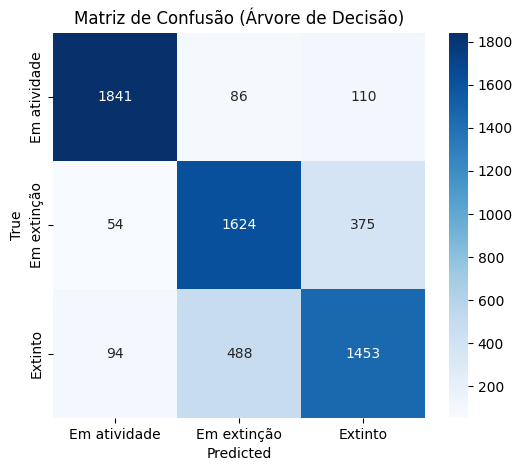

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusão (Árvore de Decisão)')
plt.show()

[Text(0.7861462636998091, 0.9838709677419355, 'x[14] <= 0.059\ngini = 0.667\nsamples = 24496\nvalue = [8170, 8154, 8172]'),
 Text(0.6377104128240301, 0.9516129032258065, 'x[14] <= 0.026\ngini = 0.593\nsamples = 15431\nvalue = [1753, 7167, 6511]'),
 Text(0.4442322671708034, 0.9193548387096774, 'x[10] <= 0.5\ngini = 0.559\nsamples = 11666\nvalue = [772, 5202, 5692]'),
 Text(0.17048226744738512, 0.8870967741935484, 'x[14] <= 0.001\ngini = 0.54\nsamples = 9704\nvalue = [421, 4792, 4491]'),
 Text(0.0434211641516194, 0.8548387096774194, 'x[14] <= 0.0\ngini = 0.494\nsamples = 1188\nvalue = [10, 490, 688]'),
 Text(0.02120325460086065, 0.8225806451612904, 'x[13] <= 0.5\ngini = 0.509\nsamples = 877\nvalue = [8, 429, 440]'),
 Text(0.010448008444702991, 0.7903225806451613, 'x[3] <= 0.5\ngini = 0.471\nsamples = 200\nvalue = [2, 71, 127]'),
 Text(0.00887618416541139, 0.7580645161290323, 'x[2] <= 0.5\ngini = 0.458\nsamples = 192\nvalue = [2, 64, 126]'),
 Text(0.006472217620612472, 0.7258064516129032,

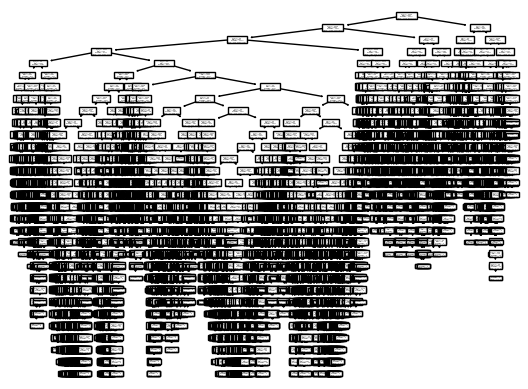

In [ ]:
tree.plot_tree(optimized_dt_clf)

## **Florestas Aleatórias (Random Forest)**

O Florestas Aleatórias é um algoritmo de aprendizado de máquina baseado em ensemble que utiliza múltiplas árvores de decisão para fazer previsões. Em vez de construir uma única árvore, o Random Forest cria várias árvores de decisão durante o treinamento, cada uma baseada em um subconjunto diferente dos dados e características. A decisão final é obtida por votação majoritária para classificação ou média para regressão entre as previsões de todas as árvores. Esse método reduz o risco de overfitting e melhora a precisão do modelo, tornando-o mais robusto e estável em comparação com uma única árvore de decisão.

Para mais detalhes: [clique aqui](https://scikit-learn.org/stable/modules/ensemble.html#random-forests-and-other-randomized-tree-ensembles).

In [ ]:
# Espaço de busca para os hiperparâmetros
param_dist = {
    'n_estimators': np.arange(100, 1000, step=100),   # Número de árvores na floresta. O parâmetro 'n_estimators' define quantas árvores o Random Forest deve construir. O intervalo é de 100 a 1000, com um passo de 100.
    'max_features': ['sqrt', 'log2'],         # Número de recursos a considerar em cada split. Este parâmetro controla quantas características serão usadas para fazer a divisão em cada nó da árvore. As opções são 'auto' (todas as características), 'sqrt' (raiz quadrada do número total de características) e 'log2' (logaritmo base 2 do número total de características).
    'max_depth': np.arange(10, 110, step=10),         # Profundidade máxima da árvore. Controla a profundidade máxima que cada árvore pode atingir, ajudando a evitar o overfitting. O intervalo é de 10 a 110, com um passo de 10.
    'min_samples_split': np.arange(2, 11, step=2),    # Número mínimo de amostras necessárias para dividir um nó. Define o número mínimo de amostras necessárias para que um nó seja dividido. O intervalo é de 2 a 10, com um passo de 2.
    'min_samples_leaf': np.arange(1, 5),              # Número mínimo de amostras em cada folha. Especifica o número mínimo de amostras que deve estar presente em uma folha. O intervalo é de 1 a 4.
    'bootstrap': [True, False]                        # Método de amostragem para construir as árvores. Se True, usa amostragem com substituição (bootstrap); se False, usa amostragem sem substituição.
}

# Instanciar o classificador Random Forest
rf_clf = RandomForestClassifier(random_state=42)  # Cria uma instância do classificador RandomForestClassifier com um valor fixo para o random_state, garantindo reprodutibilidade dos resultados.

# Configurar o RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_clf,                             # O classificador Random Forest que será ajustado.
    param_distributions=param_dist,               # O espaço de busca definido para os hiperparâmetros.
    n_iter=50,                                    # Número de combinações de parâmetros a amostrar. O RandomizedSearchCV testará 50 combinações diferentes.
    cv=3,                                         # Número de folds na validação cruzada. O modelo será avaliado com 3 folds para cada combinação de parâmetros.
    verbose=2,                                    # Nível de verbosidade para mostrar informações detalhadas durante o ajuste dos parâmetros.
    random_state=42,                              # Valor fixo para garantir a reprodutibilidade dos resultados.
    n_jobs=-1                                     # Usar todos os processadores disponíveis para acelerar o processo de ajuste dos parâmetros.
)

# Ajustar o RandomizedSearchCV
random_search.fit(X_train, y_train)              # Executa o ajuste do RandomizedSearchCV usando os dados de treinamento (X_train e y_train), buscando a melhor combinação de parâmetros para o classificador Random Forest.

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100]),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': array([1, 2, 3, 4]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10]),
                                        'n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800, 900])},
                   random_state=42, verbose=2)

In [ ]:
print(f"Melhores parâmetros encontrados: {random_search.best_params_}")

Melhores parâmetros encontrados: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': True}


In [ ]:
# Obtendo os melhores parâmetros encontrados pelo RandomizedSearchCV
best_params = random_search.best_params_  # Acessa os melhores parâmetros encontrados durante o ajuste do RandomizedSearchCV. Esses parâmetros são os que proporcionaram a melhor performance durante a validação cruzada.

# Criar um novo modelo com os melhores parâmetros
optimized_rf_clf = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],  # Define o número de árvores na floresta com base nos melhores parâmetros encontrados.
    max_features=best_params['max_features'],  # Define o número de características a serem consideradas em cada divisão com base nos melhores parâmetros encontrados.
    max_depth=best_params['max_depth'],        # Define a profundidade máxima das árvores com base nos melhores parâmetros encontrados.
    min_samples_split=best_params['min_samples_split'],  # Define o número mínimo de amostras necessárias para dividir um nó com base nos melhores parâmetros encontrados.
    min_samples_leaf=best_params['min_samples_leaf'],    # Define o número mínimo de amostras em cada folha com base nos melhores parâmetros encontrados.
    bootstrap=best_params['bootstrap'],          # Define se a amostragem com substituição deve ser usada com base nos melhores parâmetros encontrados.
    random_state=42                             # Define um valor fixo para garantir a reprodutibilidade dos resultados.
)

# Ajustar o modelo com os dados de treinamento
optimized_rf_clf.fit(X_train, y_train)        # Ajusta o modelo RandomForestClassifier com os melhores parâmetros encontrados usando os dados de treinamento (X_train e y_train).

RandomForestClassifier(max_depth=40, n_estimators=300, random_state=42)

In [ ]:
# Fazer previsões no conjunto de teste
y_pred = optimized_rf_clf.predict(X_test)  # Usa o modelo otimizado para prever as classes do conjunto de teste (X_test). As previsões são armazenadas em y_pred.

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)  # Calcula a acurácia do modelo comparando as previsões (y_pred) com os valores reais (y_test).

conf_matrix = confusion_matrix(y_test, y_pred)  # Gera a matriz de confusão, que mostra o desempenho do modelo em termos de verdadeiros positivos, verdadeiros negativos, falsos positivos e falsos negativos.

class_report = classification_report(y_test, y_pred)  # Gera um relatório detalhado de classificação, que inclui métricas como precisão, recall e F1-score para cada classe.

print(f"Acurácia: {accuracy}")
print("Matriz de Confusão:")
print(conf_matrix)
print("Relatório de Classificação:")
print(class_report)

Acurácia: 0.8070204081632653
Matriz de Confusão:
[[1839   82  116]
 [  36 1605  412]
 [  80  456 1499]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      2037
           1       0.75      0.78      0.77      2053
           2       0.74      0.74      0.74      2035

    accuracy                           0.81      6125
   macro avg       0.81      0.81      0.81      6125
weighted avg       0.81      0.81      0.81      6125



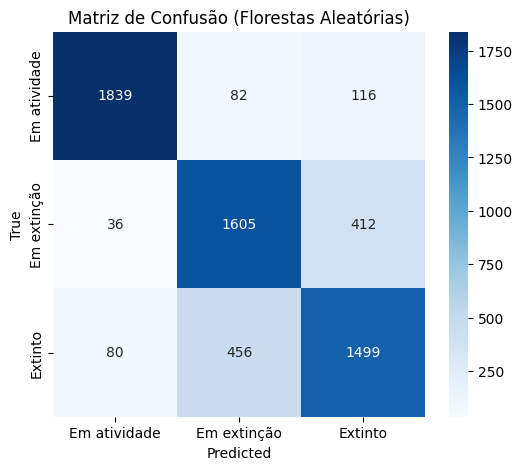

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusão (Florestas Aleatórias)')
plt.show()

## **Rede Neural - Perceptron de Multiplas Camadas (Multi Layer Perceptron)**

Um Perceptron de Multiplas Camadas é uma rede neural artificial composta por várias camadas de neurônios. Ele tem uma camada de entrada, uma ou mais camadas ocultas, e uma camada de saída. Cada neurônio em uma camada está conectado a todos os neurônios da camada seguinte, e usa funções de ativação não lineares para capturar padrões complexos nos dados. O MLP é treinado usando algoritmos de retropropagação para ajustar os pesos das conexões e minimizar o erro de previsão.

Para mais detalhes: [clique aqui](https://scikit-learn.org/stable/modules/neural_networks_supervised.html#multi-layer-perceptron).

In [ ]:
# Definir o espaço de hiperparâmetros para o RandomizedSearchCV
param_distributions = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],  # Diferentes configurações de camadas ocultas para a rede neural.
    'activation': ['tanh', 'relu'],  # Funções de ativação a serem testadas.
    'solver': ['adam', 'sgd'],  # Algoritmos de otimização a serem testados.
    'alpha': [0.0001, 0.001, 0.01],  # Termo de regularização para evitar overfitting.
    'learning_rate': ['constant', 'adaptive'],  # Estratégias de ajuste da taxa de aprendizado.
    'batch_size': [32, 64, 128]  # Tamanhos de batch para o treinamento.
}

mlp_clf = MLPClassifier(random_state=42)  # Instancia o classificador MLP com uma semente aleatória fixa para reprodutibilidade.

# Configurar o RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=mlp_clf,  # O classificador MLP que será ajustado.
    param_distributions=param_distributions,  # O espaço de busca dos hiperparâmetros.
    n_iter=50,  # Número de combinações de hiperparâmetros a serem testadas.
    cv=3,  # Número de folds na validação cruzada.
    verbose=2,  # Informações detalhadas sobre o progresso do ajuste dos hiperparâmetros.
    n_jobs=-1,  # Usar todos os núcleos de processamento disponíveis para acelerar a busca.
    random_state=42  # Semente aleatória para reprodutibilidade dos resultados.
)

# Ajustar o modelo com RandomizedSearchCV
random_search.fit(X_train, y_train)  # Ajusta o RandomizedSearchCV ao conjunto de treinamento (X_train, y_train) para encontrar a melhor combinação de hiperparâmetros.

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=MLPClassifier(random_state=42), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'activation': ['tanh', 'relu'],
                                        'alpha': [0.0001, 0.001, 0.01],
                                        'batch_size': [32, 64, 128],
                                        'hidden_layer_sizes': [(50,), (100,),
                                                               (50, 50),
                                                               (100, 50)],
                                        'learning_rate': ['constant',
                                                          'adaptive'],
                                        'solver': ['adam', 'sgd']},
                   random_state=42, verbose=2)

In [ ]:
print(f"Melhores parâmetros encontrados: {random_search.best_params_}")

Melhores parâmetros encontrados: {'solver': 'adam', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (100, 50), 'batch_size': 64, 'alpha': 0.0001, 'activation': 'tanh'}


In [ ]:
# Obter os melhores parâmetros encontrados pelo RandomizedSearchCV
best_params = random_search.best_params_

# Criar um novo modelo MLPClassifier com os melhores parâmetros encontrados
optimized_mlp_clf = MLPClassifier(
    hidden_layer_sizes=best_params['hidden_layer_sizes'],  # Configuração das camadas ocultas encontrada.
    activation=best_params['activation'],  # Função de ativação encontrada.
    solver=best_params['solver'],  # Algoritmo de otimização encontrado.
    alpha=best_params['alpha'],  # Termo de regularização encontrado.
    learning_rate=best_params['learning_rate'],  # Estratégia de ajuste da taxa de aprendizado encontrada.
    batch_size=best_params['batch_size'],  # Tamanho do batch encontrado.
    random_state=42  # Semente aleatória fixa para reprodutibilidade.
)

# Ajustar o modelo otimizado com os dados de treinamento
optimized_mlp_clf.fit(X_train, y_train)  # Ajusta o modelo MLP otimizado ao conjunto de treinamento (X_train, y_train).

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', batch_size=64, hidden_layer_sizes=(100, 50),
              learning_rate='adaptive', random_state=42)

In [ ]:
# Prever as classes para os dados de teste
y_pred = optimized_mlp_clf.predict(X_test)  # Usa o modelo otimizado para prever as classes dos dados de teste (X_test).

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)  # Calcula a acurácia das previsões comparando com os rótulos reais (y_test).
conf_matrix = confusion_matrix(y_test, y_pred)  # Gera a matriz de confusão para avaliar o desempenho do modelo.
class_report = classification_report(y_test, y_pred)  # Gera um relatório de classificação com métricas como precisão, recall e F1-score.

print(f"Acurácia: {accuracy}")
print("Matriz de Confusão:")
print(conf_matrix)
print("Relatório de Classificação:")
print(class_report)

Acurácia: 0.7324081632653061
Matriz de Confusão:
[[1713  117  207]
 [  79 1407  567]
 [ 183  486 1366]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      2037
           1       0.70      0.69      0.69      2053
           2       0.64      0.67      0.65      2035

    accuracy                           0.73      6125
   macro avg       0.74      0.73      0.73      6125
weighted avg       0.74      0.73      0.73      6125



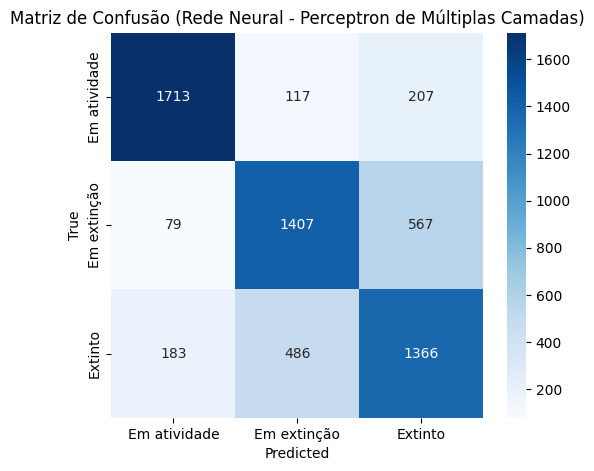

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusão (Rede Neural - Perceptron de Múltiplas Camadas)')
plt.show()

# **Conclusão**

O algoritmo que obteve a maior performance foi o Florestas Aleatórias, com 81% de acurácia e com uma maior quantidade de previsões corretas para a classe Extinto que seria a principal classe para solução do meu problema inicial. Portanto será o modelo no qual irei salvar.

In [ ]:
joblib.dump(optimized_rf_clf, 'model.joblib')

['model.joblib']